# Instacart Insights on Customer Shopping Habits

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Instacart has asked us to provide some insight into the shopping habits of its customers. We will explore the data within five different datasets to uncover some trends or similarities in behavior that could help inform future business decisions for Instacart to maximize on profitability and customer retention.<br>

<b><u>Descriptions of Each Table:</b></u>
<ul>
    <li><b>Instacart Orders ('orders')</b><br>
    Each row corresponds to one order on the Instacart app.</li>
    <li><b>Products ('products')</b><br>
    Each row corresponds to a unique product customers can buy.</li>
    <li><b>Order Products ('order_products')</b><br>
    Each row corresponds to one item placed in an order.</li>
    <li><b>Aisles ('aisles')</b><br>
    Contains information regarding grocery aisle categories for each item.</li>
    <li><b>Departments</b><br>
    Contains information regarding grocery department categories for each item.</li>
</ul>

</div>

## Initilization

In [6]:
import pandas as pd

from matplotlib import pyplot as plt

## Importing Data & Preview

In [10]:
# Each .csv file had a delimiter of ';', needed to include sep= parameter

orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')

In [11]:
# Sample of data in each .csv file

print("Orders")
print(orders.head())
print()
print()

print("Products")
print(products.head())
print()
print()

print("Order Products")
print(order_products.head())
print()
print()

print("Aisles")
print(aisles.head())
print()
print()

print("Departments")
print(departments.head())

Orders
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


Products
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5  

In [12]:
# Ran info() on each df for an overview

print("Orders")
orders.info()
print()

print("Products")
products.info()
print()

# Order Products contains 4,545,007 entries and didn't include non-null values, included show_counts=True parameter
print("Order Products")
order_products.info(show_counts=True)
print()

print("Aisles")
aisles.info()
print()

print("Departments")
departments.info()
print()


Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

Products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object

<div style="border: 2px solid black; padding: 10px; margin: 10px">

All data types validated and coincide with their intended purpose according to data dictionary

</div>

## Duplicates

### Orders DF

In [18]:
# Check for duplicated orders

print(orders.duplicated().sum())

15


In [19]:
# Check for all orders placed Wednesday at 2:00 AM

orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [20]:
# Remove duplicate orders

orders.drop_duplicates(inplace=True)
## Drop duplicate rows to ensure data is clean and analysis is accurate. 
## Used "inplace=" parameter for more efficient code.

In [21]:
# Double check for duplicate rows

print(orders.duplicated().sum())

0


In [22]:
# Double check for duplicate order IDs only

print(orders['order_id'].duplicated().sum())

0


### Products DF

In [26]:
# Check for fully duplicate rows

print(products.duplicated().sum())

0


In [27]:
# Check for just duplicate product IDs

print(products['product_id'].duplicated().sum())

0


In [28]:
# Check for just duplicate product names (convert names to lowercase to compare better)

products['product_name'] = products['product_name'].str.lower()

print("Number of duplicated product names:", products['product_name'].duplicated().sum())

Number of duplicated product names: 1361


In [29]:
# Check for duplicate product names that aren't missing values.

duplicated_products_df = products[products['product_name'].duplicated()]

duplicated_products_df[~duplicated_products_df['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


<div style="border: 2px solid black; padding: 10px; margin: 10px">

There are 104 rows with duplicated product names that aren't missing values.

</div>

### `order_products` data frame

In [34]:
# Check for fully duplicate rows

print(order_products.duplicated().sum())

0


In [35]:
# Double check for any other tricky duplicates

print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


## Find and remove missing values


### `products` data frame

In [40]:
# Checking for duplicated products with missing values within product_names.

duplicated_products_df[duplicated_products_df['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


<div style="border: 2px solid black; padding: 10px; margin: 10px">

There are 1,257 rows of duplicated products with missing values within product_names.

</div>

In [42]:
# Are all of the missing product names associated with aisle ID 100?

missing_products = duplicated_products_df[duplicated_products_df['product_name'].isna()]

print(missing_products['aisle_id'].value_counts())

aisle_id
100    1257
Name: count, dtype: int64


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Yes, all of the missing product names are associated with aisle ID 100.

</div>

In [44]:
# Are all of the missing product names associated with department ID 21?

print(missing_products['department_id'].value_counts())

department_id
21    1257
Name: count, dtype: int64


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Yes, all the missing product names are also associated with department ID 21.

</div>

In [46]:
# What is this aisle and department?

print(aisles.iloc[99])
print()

print(departments.iloc[20])

aisle_id        100
aisle       missing
Name: 99, dtype: object

department_id         21
department       missing
Name: 20, dtype: object


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Both Aisle 100 and Department 21 are missing from the dataset.

</div>

In [48]:
# Fill missing product names with 'Unknown'

products['product_name'] = products['product_name'].fillna(value='Unknown')

### `orders` data frame

In [52]:
# Are there any missing values where it's not a customer's first order?

orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Yes, there are 28,817 missing values in "days_since_prior_order".

</div>

### `order_products` data frame

In [57]:
# What are the min and max values in this column?

print("Add To Cart Min:", order_products['add_to_cart_order'].min())
print()
      
print("Add To Cart Max:", order_products['add_to_cart_order'].max())

Add To Cart Min: 1.0

Add To Cart Max: 64.0


In [58]:
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [59]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

add_to_cart_order = order_products['add_to_cart_order'].isna()
add_to_cart_order = add_to_cart_order == True

In [60]:
# Do all orders with missing values have more than 64 products?

<div style="border: 2px solid black; padding: 10px; margin: 10px">

No, the max value in "add_to_cart_order" is 64 for all values.

</div>

In [62]:
# Replace missing values with 999 and convert column to integer type

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(value=999)

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Level 1 Tasks

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [67]:
# Verifying order_hour_of_day and order_dow values are sensible.

print("Order Hour of Day Range")
print("Min Value:", orders['order_hour_of_day'].min(), "Max Value:", orders['order_hour_of_day'].max())
print()

print("Order Day of Week Range")
print("Min Value:", orders['order_dow'].min(), "Max Value:", orders['order_dow'].max())

Order Hour of Day Range
Min Value: 0 Max Value: 23

Order Day of Week Range
Min Value: 0 Max Value: 6


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Both ranges are within normal limits for the data they are representing.

</div>

### [A2] What time of day do people shop for groceries?

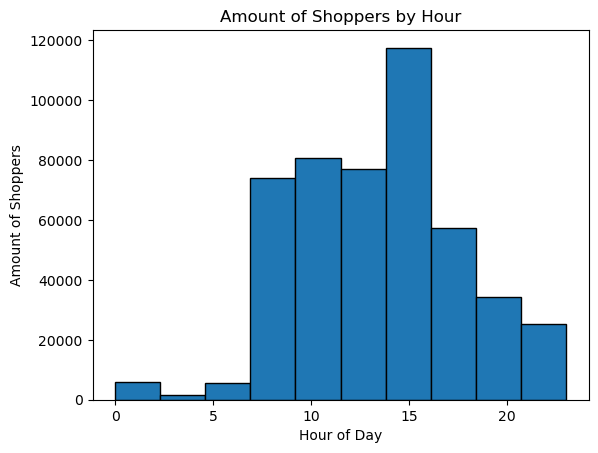

In [72]:
orders['order_hour_of_day'].plot(kind='hist', bins=10, title='Amount of Shoppers by Hour', edgecolor='black')

plt.xlabel('Hour of Day')
plt.ylabel('Amount of Shoppers')

plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Most shoppers shop around 3pm.

</div>

### [A3] What day of the week do people shop for groceries?

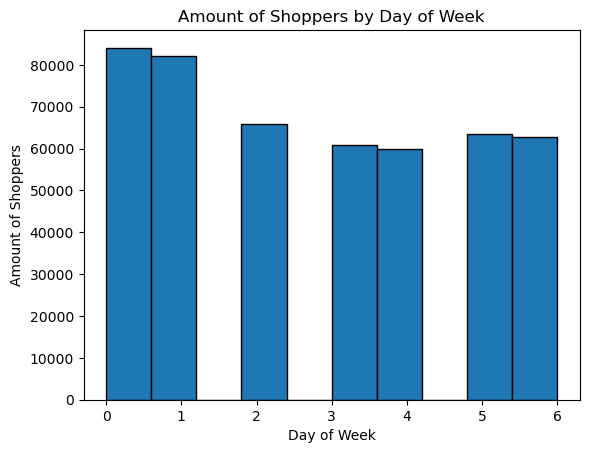

In [77]:
orders['order_dow'].plot(kind='hist', title='Amount of Shoppers by Day of Week', edgecolor='black')

plt.xlabel('Day of Week')
plt.ylabel('Amount of Shoppers')

plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Most people shop for groceries on Sunday. This could be because it marks the beginning of the week for most people and they have a better idea of what they'll need for the rest of the week. They probably work as well Monday through Friday and so may not have time to go shopping during the week days.

</div>

### [A4] How long do people wait until placing another order?

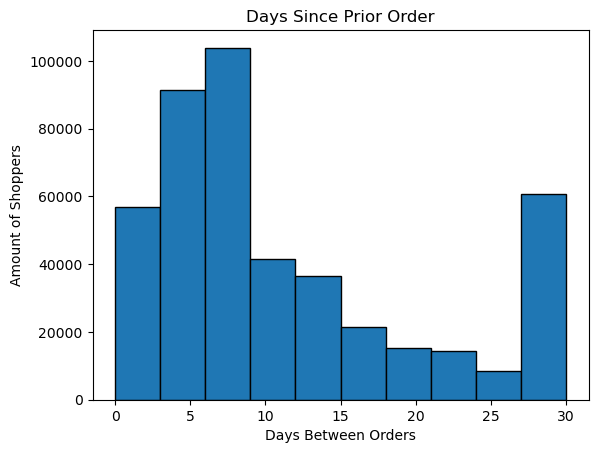

In [82]:
orders['days_since_prior_order'].plot(kind='hist', title='Days Since Prior Order', edgecolor='black')

plt.xlabel('Days Between Orders')
plt.ylabel('Amount of Shoppers')

plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

People typically wait between 6-9 days between orders. It also seems there are an equal amount of customers who shop every day, and who shop once every 30 days

</div>

# [B] Level 2 Tasks

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

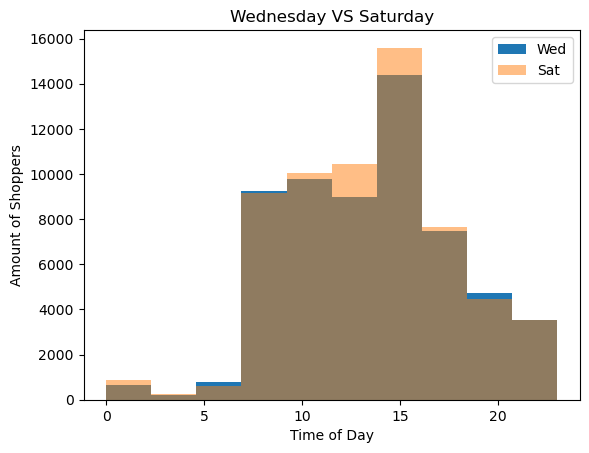

In [88]:
orders[orders['order_dow'] == 4]['order_hour_of_day'].plot(kind='hist')
orders[orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', alpha=0.5)

plt.xlabel('Time of Day')
plt.ylabel('Amount of Shoppers')
plt.title('Wednesday VS Saturday')

plt.legend(['Wed', 'Sat'])
plt.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The distributions are very similar except for around 12pm and 3pm where more shoppers are shopping on Saturday than Wednesday.

</div>

### [B2] What's the distribution for the number of orders per customer?

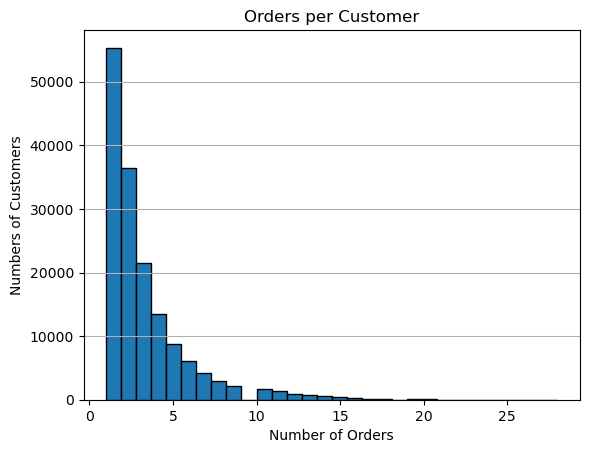

In [93]:
orders_per_cust = orders.groupby('user_id')['order_id'].nunique().values

plt.hist(orders_per_cust, bins=30, edgecolor='black')
plt.title('Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Numbers of Customers')
plt.grid(axis='y')

plt.show()

## The higher the amount of orders, the less amount of customers 

### [B3] What are the top 20 popular products (display their id and name)?

In [97]:
top_20_prod = order_products['product_id'].value_counts().head(20).reset_index()
top_20_prod.columns = ['product_id', 'order_count']

top_20_prod = top_20_prod.merge(products[['product_id', 'product_name']], on='product_id', how='left')

print(top_20_prod)


    product_id  order_count              product_name
0        24852        66050                    banana
1        13176        53297    bag of organic bananas
2        21137        37039      organic strawberries
3        21903        33971      organic baby spinach
4        47209        29773      organic hass avocado
5        47766        24689           organic avocado
6        47626        21495               large lemon
7        16797        20018              strawberries
8        26209        19690                     limes
9        27845        19600        organic whole milk
10       27966        19197       organic raspberries
11       22935        15898      organic yellow onion
12       24964        15292            organic garlic
13       45007        14584          organic zucchini
14       39275        13879       organic blueberries
15       49683        13675            cucumber kirby
16       28204        12544        organic fuji apple
17        5876        12232 

# [C] Level 3 Tasks

### [C1] How many items do people typically buy in one order? What does the distribution look like?

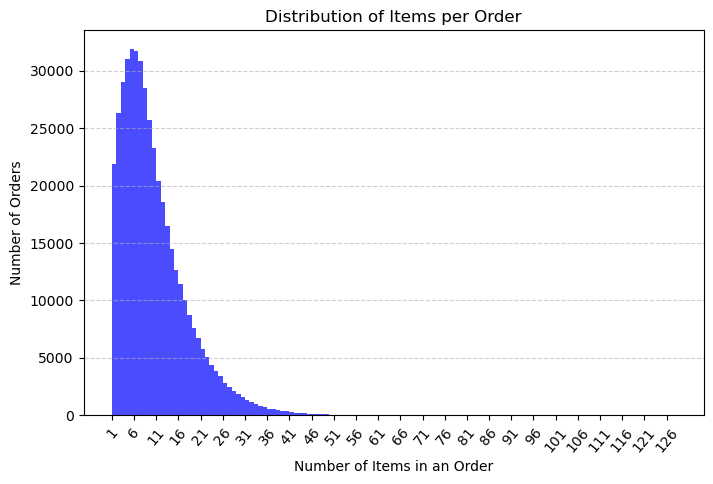

In [102]:
items_per_order = order_products.groupby('order_id').size()

plt.figure(figsize=(8, 5))
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 2), color='blue', alpha=0.7)

plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items in an Order')
plt.ylabel('Number of Orders')
plt.xticks(range(1, items_per_order.max() + 1, 5), rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [106]:
reordered_items = order_products[order_products['reordered'] == 1]
reordered_items_merged = reordered_items.merge(products, on='product_id')

top_20_reordered = reordered_items_merged.groupby(['product_id', 'product_name']).size().reset_index(name='count')
top_20_reordered = top_20_reordered.sort_values(by='count', ascending=False).head(20)

print(top_20_reordered)

       product_id              product_name  count
18104       24852                    banana  55763
9528        13176    bag of organic bananas  44450
15368       21137      organic strawberries  28639
15936       21903      organic baby spinach  26233
34407       47209      organic hass avocado  23629
34828       47766           organic avocado  18743
20285       27845        organic whole milk  16251
34725       47626               large lemon  15044
20375       27966       organic raspberries  14748
12193       16797              strawberries  13945
19088       26209                     limes  13327
16700       22935      organic yellow onion  11145
18186       24964            organic garlic  10411
32792       45007          organic zucchini  10076
36219       49683            cucumber kirby   9538
20543       28204        organic fuji apple   8989
5978         8277  apple honeycrisp organic   8836
28607       39275       organic blueberries   8799
4267         5876             o

# Conclusions
There were a few insights I took from this analysis. Most customers order towards the beginning of the week on Sunday and the most popular items are all from produce, some organic as well. Marketing and coupons/promotions can be targeted towards produce and on certain times of the week to help create more use of the app and generate more revenue. 

There could also be some further investigation into a "frequent flyer" incentive to help increase the amount of orders per customer seeing as most customers only order 1-5 orders. Some more research could be done into this realm to figure out how to improve customer satisfaction with the service to increase usage.